In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import numpy as np
import pandas as pd

np.random.seed(42)

ROWS = 20000

# ----------------------------
# Generate Gender
# ----------------------------
gender = np.random.choice(["Male", "Female"], size=ROWS)

# ----------------------------
# Height Distributions (cm)
# ----------------------------
# Male:   mean=175, std=7
# Female: mean=162, std=6

height = np.where(
    gender == "Male",
    np.random.normal(175, 7, ROWS),
    np.random.normal(162, 6, ROWS)
)

height = np.clip(height, 140, 200)
height = np.round(height, 1)

# ----------------------------
# Weight correlated with height
# Formula: weight ≈ height - 100 + noise
# ----------------------------
noise = np.random.normal(0, 6, ROWS)

weight = height - 100 + noise
weight = np.clip(weight, 40, 130)
weight = np.round(weight, 1)

# ----------------------------
# Create DataFrame
# ----------------------------
df = pd.DataFrame({
    "gender": gender,
    "height": height,
    "weight": weight
})

print(df.head())
print("\nShape:", df.shape)


   gender  height  weight
0    Male   164.6    73.1
1  Female   162.0    66.2
2    Male   177.7    74.7
3    Male   166.8    75.2
4    Male   182.8    85.6

Shape: (20000, 3)


In [8]:
# ----------------------------
# Inject 1% Outliers
# ----------------------------
outlier_count = int(0.01 * ROWS)
indices = np.random.choice(df.index, outlier_count, replace=False)

df.loc[indices, "height"] = np.random.choice(
    [120, 210, 230], outlier_count
)

df.loc[indices, "weight"] = np.random.choice(
    [30, 180, 220], outlier_count
)


In [9]:
df[['height']].describe()

,height
count,20000.000000
mean,168.726570
std,10.433076
min,120.000000
25%,161.600000
50%,168.100000
75%,175.400000
max,230.000000


<Axes: xlabel='height', ylabel='Density'>

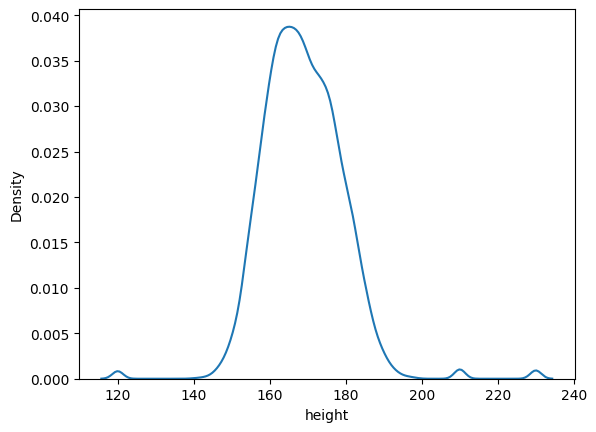

In [10]:
sns.kdeplot(df['height'])

<Axes: ylabel='height'>

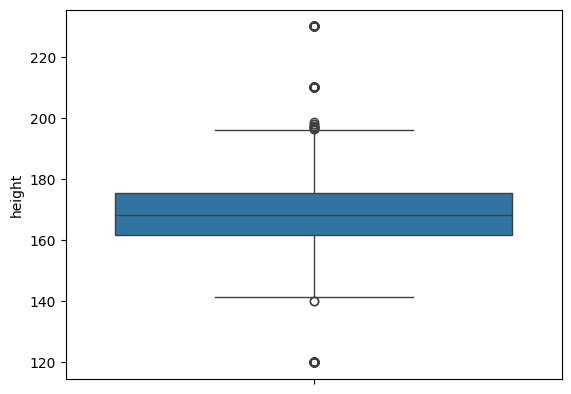

In [11]:
sns.boxplot(df['height'])

In [14]:
upper_limit = df['height'].quantile(.97)
upper_limit

np.float64(186.5)

In [16]:
lower_limit = df['height'].quantile(.03)
lower_limit

np.float64(152.5)

In [18]:

#outliers

df[(df['height'] < lower_limit) | (df['height'] > upper_limit)]

,gender,height,weight
27,Female,151.9,50.3
37,Male,191.9,91.5
48,Female,145.6,45.2
57,Male,190.1,90.8
66,Female,147.4,56.1
...,...,...,...
19930,Female,152.4,49.9
19937,Female,148.4,51.8
19953,Female,151.3,43.7
19979,Male,187.5,88.4


In [20]:
new_df = df[(df['height'] > lower_limit) & (df['height'] < upper_limit)]

In [23]:
df['height'].describe()

,height
count,20000.000000
mean,168.726570
std,10.433076
min,120.000000
25%,161.600000
50%,168.100000
75%,175.400000
max,230.000000


In [21]:
new_df['height'].describe()

,height
count,18773.000000
mean,168.544521
std,8.192625
min,152.600000
25%,162.100000
50%,168.100000
75%,174.900000
max,186.400000


<Axes: xlabel='height', ylabel='Density'>

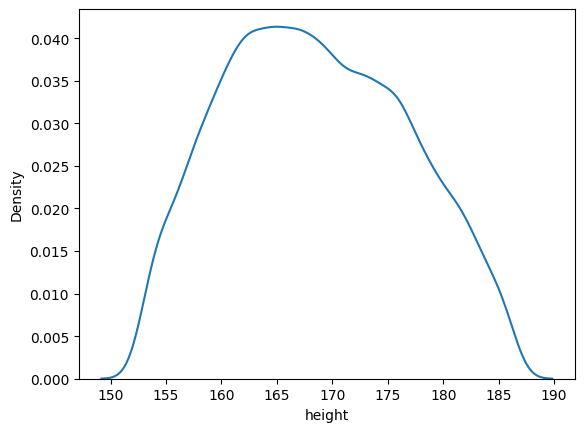

In [24]:
sns.kdeplot(new_df['height'])

<Axes: ylabel='height'>

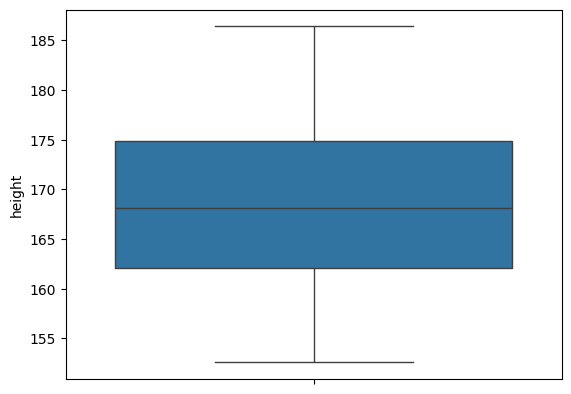

In [25]:
sns.boxplot(new_df['height'])